# Kaggle: House Prices: Advanced Regression Techniques - ANALYSIS 2 (Prediction)

__Predict sales prices and practice feature engineering, RFs, and gradient boosting__

![](https://camo.githubusercontent.com/1721729c963e9c92788c73c8e1d38661cf377eed/68747470733a2f2f7777772e7265616c657374617465636f6e73756c74696e672e636f6d2f77702d636f6e74656e742f75706c6f6164732f323031372f31322f424d49466561747572652d57686572652d4172652d57652d496e2d486f7573696e672d4379636c652e706e67)


[Kaggle: House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

#### Objective  - build most predictive model for sales price of homes (limited to techniches learning in MSDS class)
Produce the following modesl (4):
1. Foward Selection
2. Backward elimination
3. Stepwise selection
4. Custom built

Generate:
- Adjusted R2
- CV Press
- Kaggle Score

### Imports

In [129]:
import pandas as pd  # data manipultion librabry
import numpy as np # numerical computation library

# Display up to 90 columns of a dataframe
pd.set_option('display.max_columns', 90)

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [135]:
df = pd.read_csv("./train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


__Data Quality Check__

lets check the columns that contain NaN value

In [9]:
print(df.columns[df.isnull().any()].tolist())
fake = pd.DataFrame(df.isnull().sum())
fake[fake[0].values > 0]

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


### One Hot Encoding Categorical Variables

__MSZoning__

In [131]:
def category_view(df, variable):
    fig = plt.figure()   
    fig = sns.countplot(variable)
    print(variable.describe())
    print(variable.unique())
    print("number of categories: ", len(variable.unique()))
    #var_name = (variable.name + str(len(variable.unique())))
    #print(var_name)
    
    # dummy_na = True; Treat Nulls/NaNs as a separate category
    dummy = pd.get_dummies(variable, prefix_sep='' ,prefix=variable.name, dummy_na = variable.isnull().any(),
                               drop_first=False)
    # drop last column
    dummy = dummy[dummy.columns[:-1]]
    df = pd.concat([df, dummy], axis = 1)
    return df
    

In [137]:
df.loc[df.MSZoning=="C (all)", 'MSZoning'] = 'all'

In [161]:
df.garage_decade.unique()

array([2000., 1970., 1990., 1930., 1960., 1950., 1920.,   nan, 1980.,
       1940., 1910., 1900., 2010.])

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
['RL' 'RM' 'all' 'FV' 'RH']
number of categories:  5
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
number of categories:  15
count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object
['Pave' 'Grvl']
number of categories:  2
count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object
[nan 'Grvl' 'Pave']
number of categories:  3
count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object
['Lvl' 'Bnk' 'Low' 'HLS']
number of categories:  4
count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object
['AllPub' 'NoSeWa']
number of categories:  2
count       1460
un

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
number of categories:  5
count     1460
unique       4
top         TA
freq       906
Name: ExterQual, dtype: object
['Gd' 'TA' 'Ex' 'Fa']
number of categories:  4
count     1460
unique       5
top         TA
freq      1282
Name: ExterCond, dtype: object
['TA' 'Gd' 'Fa' 'Po' 'Ex']
number of categories:  5
count      1460
unique        6
top       PConc
freq        647
Name: Foundation, dtype: object
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
number of categories:  6
count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object
['Gd' 'TA' 'Ex' nan 'Fa']
number of categories:  5
count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object
['TA' 'Gd' nan 'Fa' 'Po']
number of categories:  5
count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object
['No' 'Gd' 'Mn' 'Av' nan]
number of categories:  5
count     1423
unique       6
top        Unf
freq      

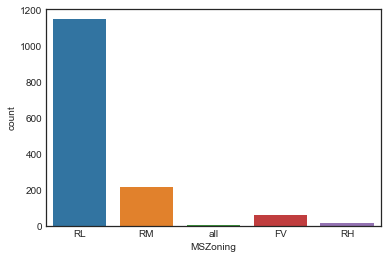

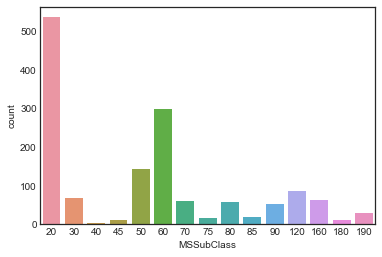

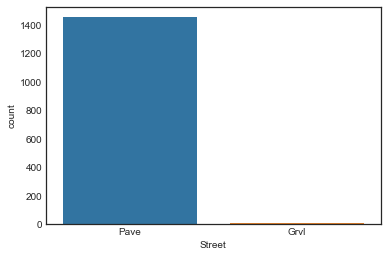

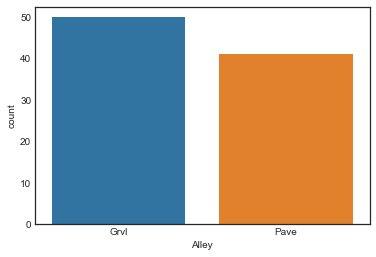

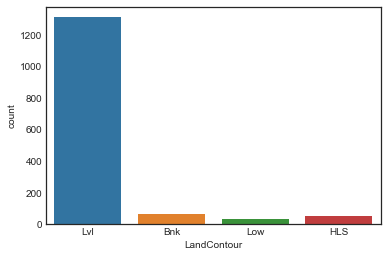

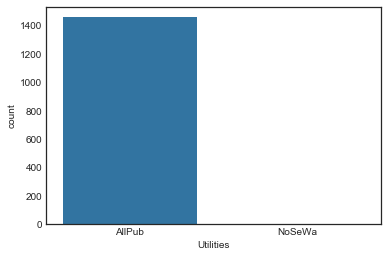

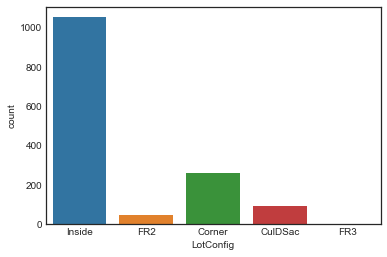

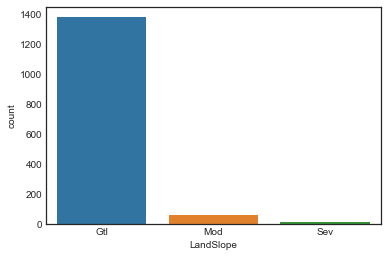

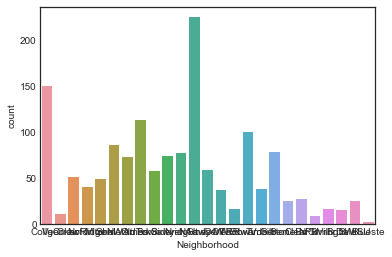

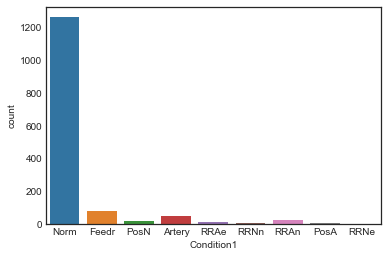

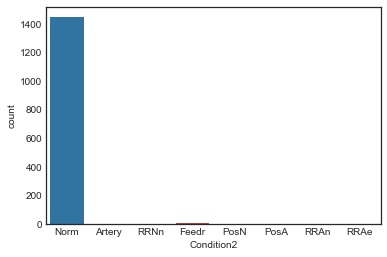

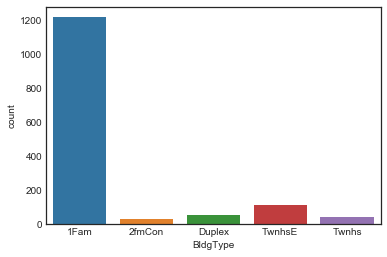

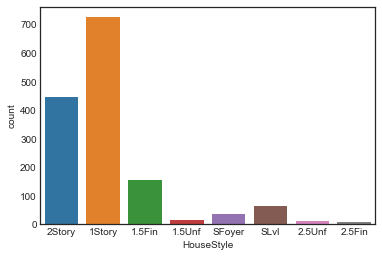

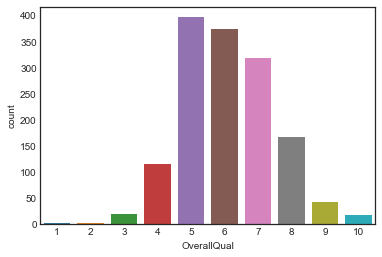

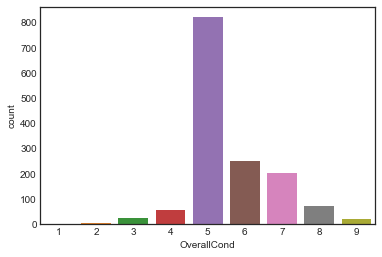

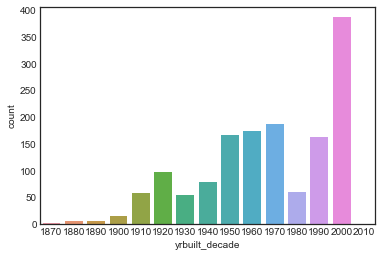

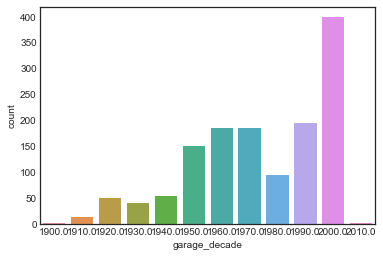

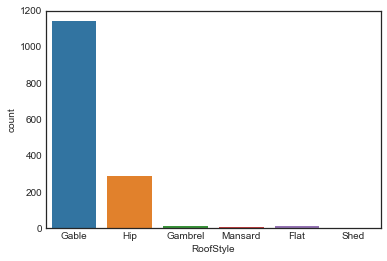

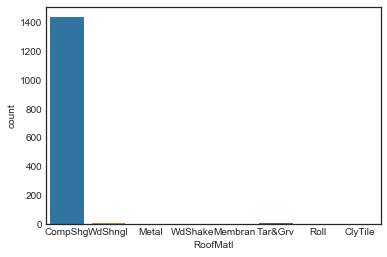

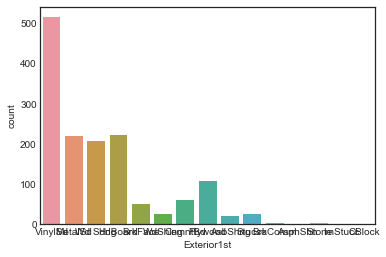

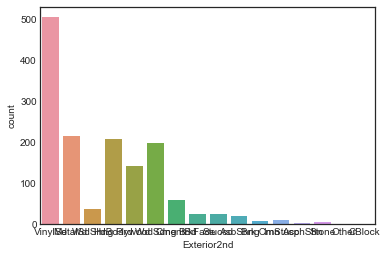

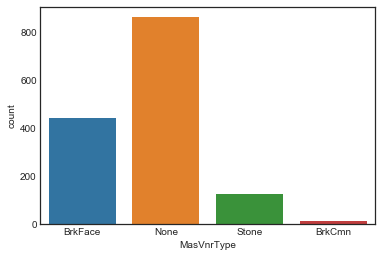

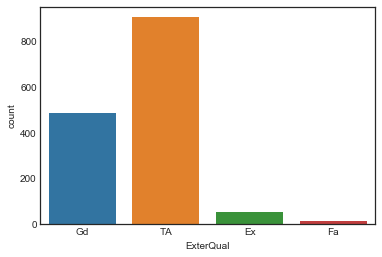

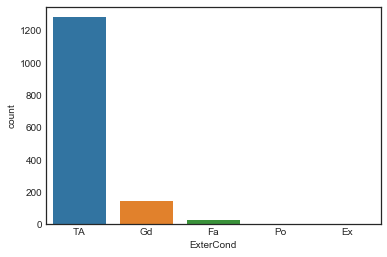

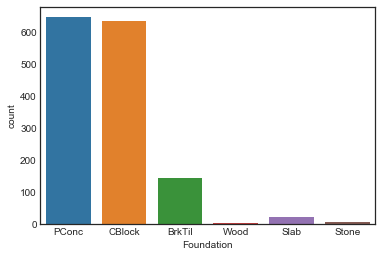

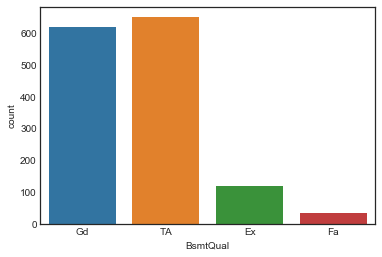

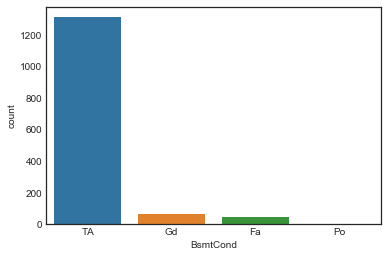

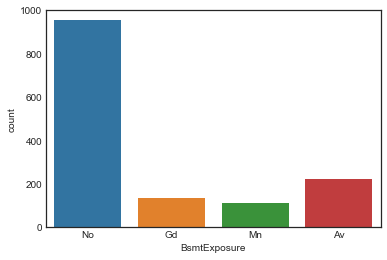

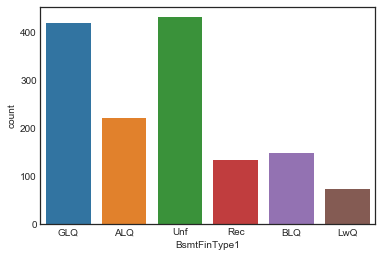

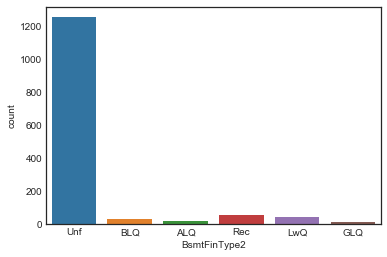

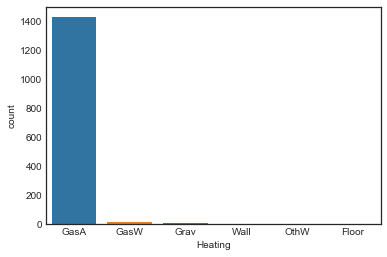

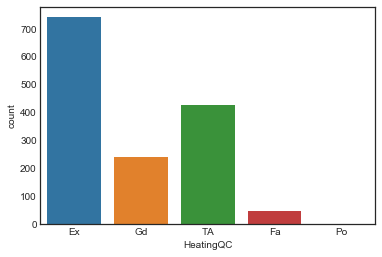

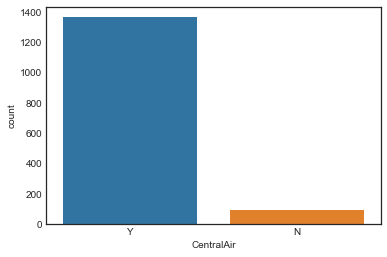

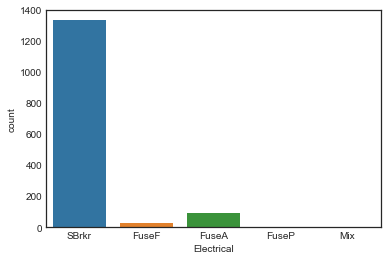

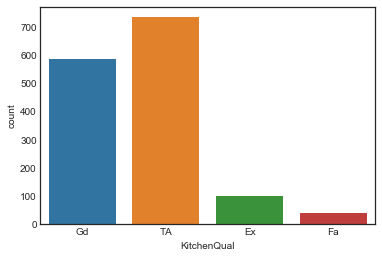

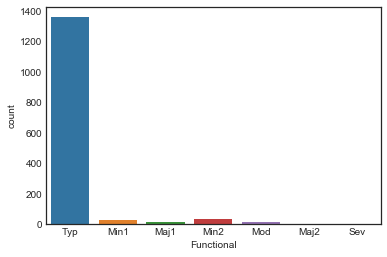

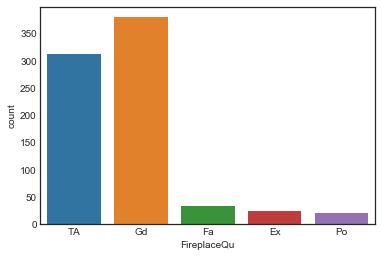

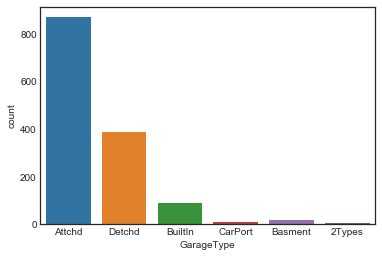

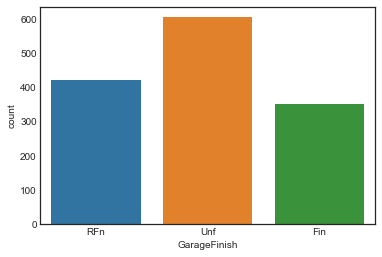

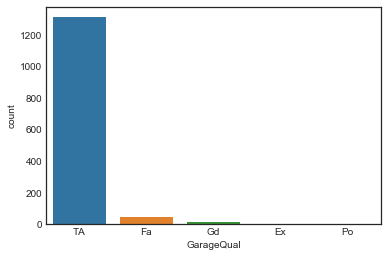

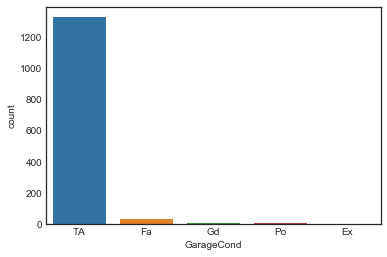

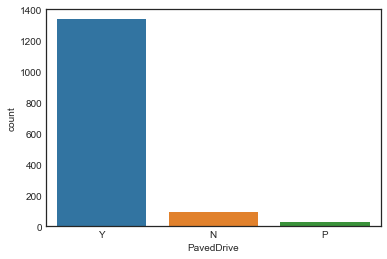

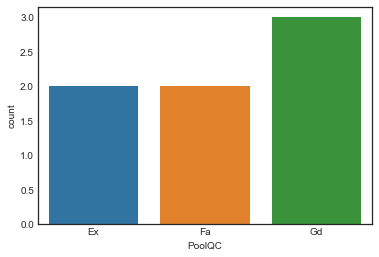

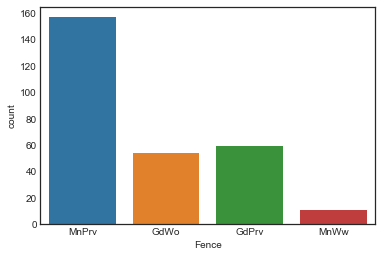

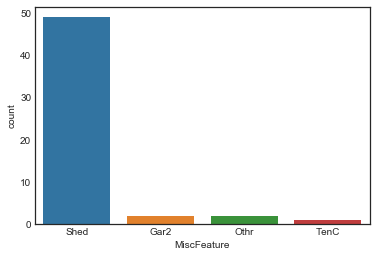

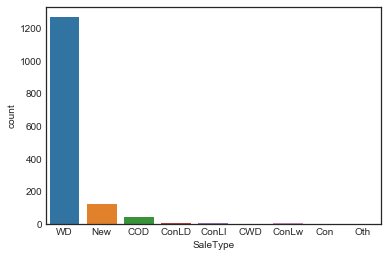

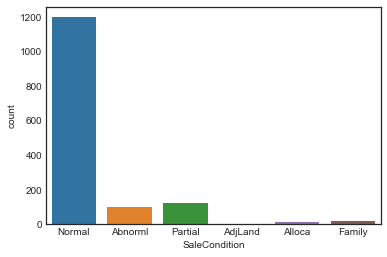

In [138]:
df = category_view(df, df.MSZoning)
df = category_view(df, df.MSSubClass)
df = category_view(df, df.Street)
df = category_view(df, df.Alley)
df = category_view(df, df.LandContour)
df = category_view(df, df.Utilities)
df = category_view(df, df.LotConfig)
df = category_view(df, df.LandSlope)
df = category_view(df, df.Neighborhood)
df = category_view(df, df.Condition1)
df = category_view(df, df.Condition2)
df = category_view(df, df.BldgType)
df = category_view(df, df.HouseStyle)
df = category_view(df, df.OverallQual)
df = category_view(df, df.OverallCond)

# create new cateogry for year build in terms of decade
df['yrbuilt_decade'] = (df.YearBuilt // 10) * 10
df = category_view(df, df.yrbuilt_decade)

df['garage_decade'] = (df.GarageYrBlt // 10) * 10
df = category_view(df, df.garage_decade)

df = category_view(df, df.RoofStyle)
df = category_view(df, df.RoofMatl)
df = category_view(df, df.Exterior1st)
df = category_view(df, df.Exterior2nd)
df = category_view(df, df.MasVnrType)
df = category_view(df, df.ExterQual)
df = category_view(df, df.ExterCond)
df = category_view(df, df.Foundation)
df = category_view(df, df.BsmtQual)
df = category_view(df, df.BsmtCond)
df = category_view(df, df.BsmtExposure)
df = category_view(df, df.BsmtFinType1)
df = category_view(df, df.BsmtFinType2)
df = category_view(df, df.Heating)
df = category_view(df, df.HeatingQC)
df = category_view(df, df.CentralAir)
df = category_view(df, df.Electrical)
df = category_view(df, df.KitchenQual)
df = category_view(df, df.Functional)
df = category_view(df, df.FireplaceQu)
df = category_view(df, df.GarageType)
df = category_view(df, df.GarageFinish)
df = category_view(df, df.GarageQual)
df = category_view(df, df.GarageCond)
df = category_view(df, df.PavedDrive)
df = category_view(df, df.PoolQC)
df = category_view(df, df.Fence)
df = category_view(df, df.MiscFeature)
df = category_view(df, df.SaleType)
df = category_view(df, df.SaleCondition)

In [146]:
df.columns == 'SalePrice'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [153]:
all_columns = "+".join(df.drop(labels=['Id','SalePrice'], axis=1).columns)

In [159]:
all_columns

'MSSubClass+MSZoning+LotFrontage+LotArea+Street+Alley+LotShape+LandContour+Utilities+LotConfig+LandSlope+Neighborhood+Condition1+Condition2+BldgType+HouseStyle+OverallQual+OverallCond+YearBuilt+YearRemodAdd+RoofStyle+RoofMatl+Exterior1st+Exterior2nd+MasVnrType+MasVnrArea+ExterQual+ExterCond+Foundation+BsmtQual+BsmtCond+BsmtExposure+BsmtFinType1+BsmtFinSF1+BsmtFinType2+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+Heating+HeatingQC+CentralAir+Electrical+1stFlrSF+2ndFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+KitchenQual+TotRmsAbvGrd+Functional+Fireplaces+FireplaceQu+GarageType+GarageYrBlt+GarageFinish+GarageCars+GarageArea+GarageQual+GarageCond+PavedDrive+WoodDeckSF+OpenPorchSF+EnclosedPorch+3SsnPorch+ScreenPorch+PoolArea+PoolQC+Fence+MiscFeature+MiscVal+MoSold+YrSold+SaleType+SaleCondition+MSZoningFV+MSZoningRH+MSZoningRL+MSZoningRM+MSSubClass20+MSSubClass30+MSSubClass40+MSSubClass45+MSSubClass50+MSSubClass60+MSSubClass70+MSSubClass75+MSSubClas

In [158]:
model = smf.ols(formula='SalePrice ~ ' + all_columns[:46],data = df).fit()
anova_ = sm.stats.anova_lm(model, typ=1)
print(anova_)
print(model.summary())

                 df        sum_sq       mean_sq           F        PR(>F)
MSZoning        4.0  9.542000e+11  2.385500e+11   43.977634  1.821261e-34
Street          1.0  2.489085e+09  2.489085e+09    0.458873  4.982828e-01
MSSubClass      1.0  5.181760e+09  5.181760e+09    0.955278  3.285778e-01
LotFrontage     1.0  6.669092e+11  6.669092e+11  122.947349  2.924900e-27
LotArea         1.0  2.499713e+11  2.499713e+11   46.083191  1.782866e-11
Residual     1192.0  6.465823e+12  5.424348e+09         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     43.29
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           3.91e-61
Time:                        07:28:36   Log-Likelihood:                -15159.
No. Obse